In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-oct-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-oct-2021/train.csv
/kaggle/input/tabular-playground-series-oct-2021/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Tabular Playground Series - Oct 2021

The tabular series on kaggle are meant to help novices in data science field like me get acquainted with kaggle competitions.

The dataset created for this competition is synthetic, but based on a real dataset and generated using a CTGAN. The original dataset deals with predicting the biological response of molecules given various chemical properties. 

The first step in almost every data science project is to perfom some exploratory data analysis. This is what we will present here in this notebook.

# Train dataset

Lets first explore the train dataset and subsequently the test dataset.

In [4]:
train_df = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2021/train.csv', sep=',')

In [5]:
train_df.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f276,f277,f278,f279,f280,f281,f282,f283,f284,target
0,0,0.205979,0.410993,0.176775,0.223581,0.423543,0.476140,0.413590,0.612021,0.534873,...,0,1,0,0,0,0,0,0,0,1
1,1,0.181004,0.473119,0.011734,0.213657,0.619678,0.441593,0.230407,0.686013,0.281971,...,0,1,0,0,0,0,0,0,0,1
2,2,0.182583,0.307431,0.325950,0.207116,0.605699,0.309695,0.493337,0.751107,0.536272,...,0,0,0,1,1,0,0,0,0,1
3,3,0.180240,0.494592,0.008367,0.223580,0.760618,0.439211,0.432055,0.776147,0.483958,...,0,0,0,0,1,0,0,0,0,1
4,4,0.177172,0.495513,0.014263,0.548819,0.625396,0.562493,0.117158,0.561255,0.077115,...,0,1,1,0,1,0,0,1,0,1


In [6]:
print('Dataset shape: ', train_df.shape )

Dataset shape:  (1000000, 287)


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Columns: 287 entries, id to target
dtypes: float64(240), int64(47)
memory usage: 2.1 GB


In [8]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,1000000.0,499999.500000,288675.278933,0.000000,249999.750000,499999.500000,749999.250000,999999.000000
f0,1000000.0,0.214334,0.053320,0.041790,0.181676,0.204498,0.229684,1.000000
f1,1000000.0,0.460218,0.101316,0.022016,0.389215,0.453893,0.526023,0.959019
f2,1000000.0,0.129253,0.120805,0.000381,0.017692,0.095496,0.177717,0.994818
f3,1000000.0,0.277598,0.063163,0.000000,0.235342,0.264669,0.305837,0.979797
...,...,...,...,...,...,...,...,...
f281,1000000.0,0.199331,0.399498,0.000000,0.000000,0.000000,0.000000,1.000000
f282,1000000.0,0.156065,0.362917,0.000000,0.000000,0.000000,0.000000,1.000000
f283,1000000.0,0.183741,0.387273,0.000000,0.000000,0.000000,0.000000,1.000000
f284,1000000.0,0.154680,0.361600,0.000000,0.000000,0.000000,0.000000,1.000000


In [9]:
print("There are", train_df.isna().any().sum(), "missing values")
print()
print(train_df.isna().sum())
print()
print(train_df.isnull().sum())

There are 0 missing values

id        0
f0        0
f1        0
f2        0
f3        0
         ..
f281      0
f282      0
f283      0
f284      0
target    0
Length: 287, dtype: int64

id        0
f0        0
f1        0
f2        0
f3        0
         ..
f281      0
f282      0
f283      0
f284      0
target    0
Length: 287, dtype: int64


# Summary 1

The dataset contains 1 million of rows and 287 variables. Of those 287, 240 variables are of float64 type and 47 of int type. Those of int type suggest some categorical variables, lets verify how many categories are there among these variables.

In [10]:
min_cat_n = train_df.select_dtypes(include='int64').drop(['id', 'target'], axis=1).nunique().min()
max_cat_n = train_df.select_dtypes(include='int64').drop(['id', 'target'], axis=1).nunique().max()

print('The minimum number of classes in the categorical variables is', min_cat_n)
print('The maximum number of classes in the categorical variables is', max_cat_n)

The minimum number of classes in the categorical variables is 2
The maximum number of classes in the categorical variables is 2


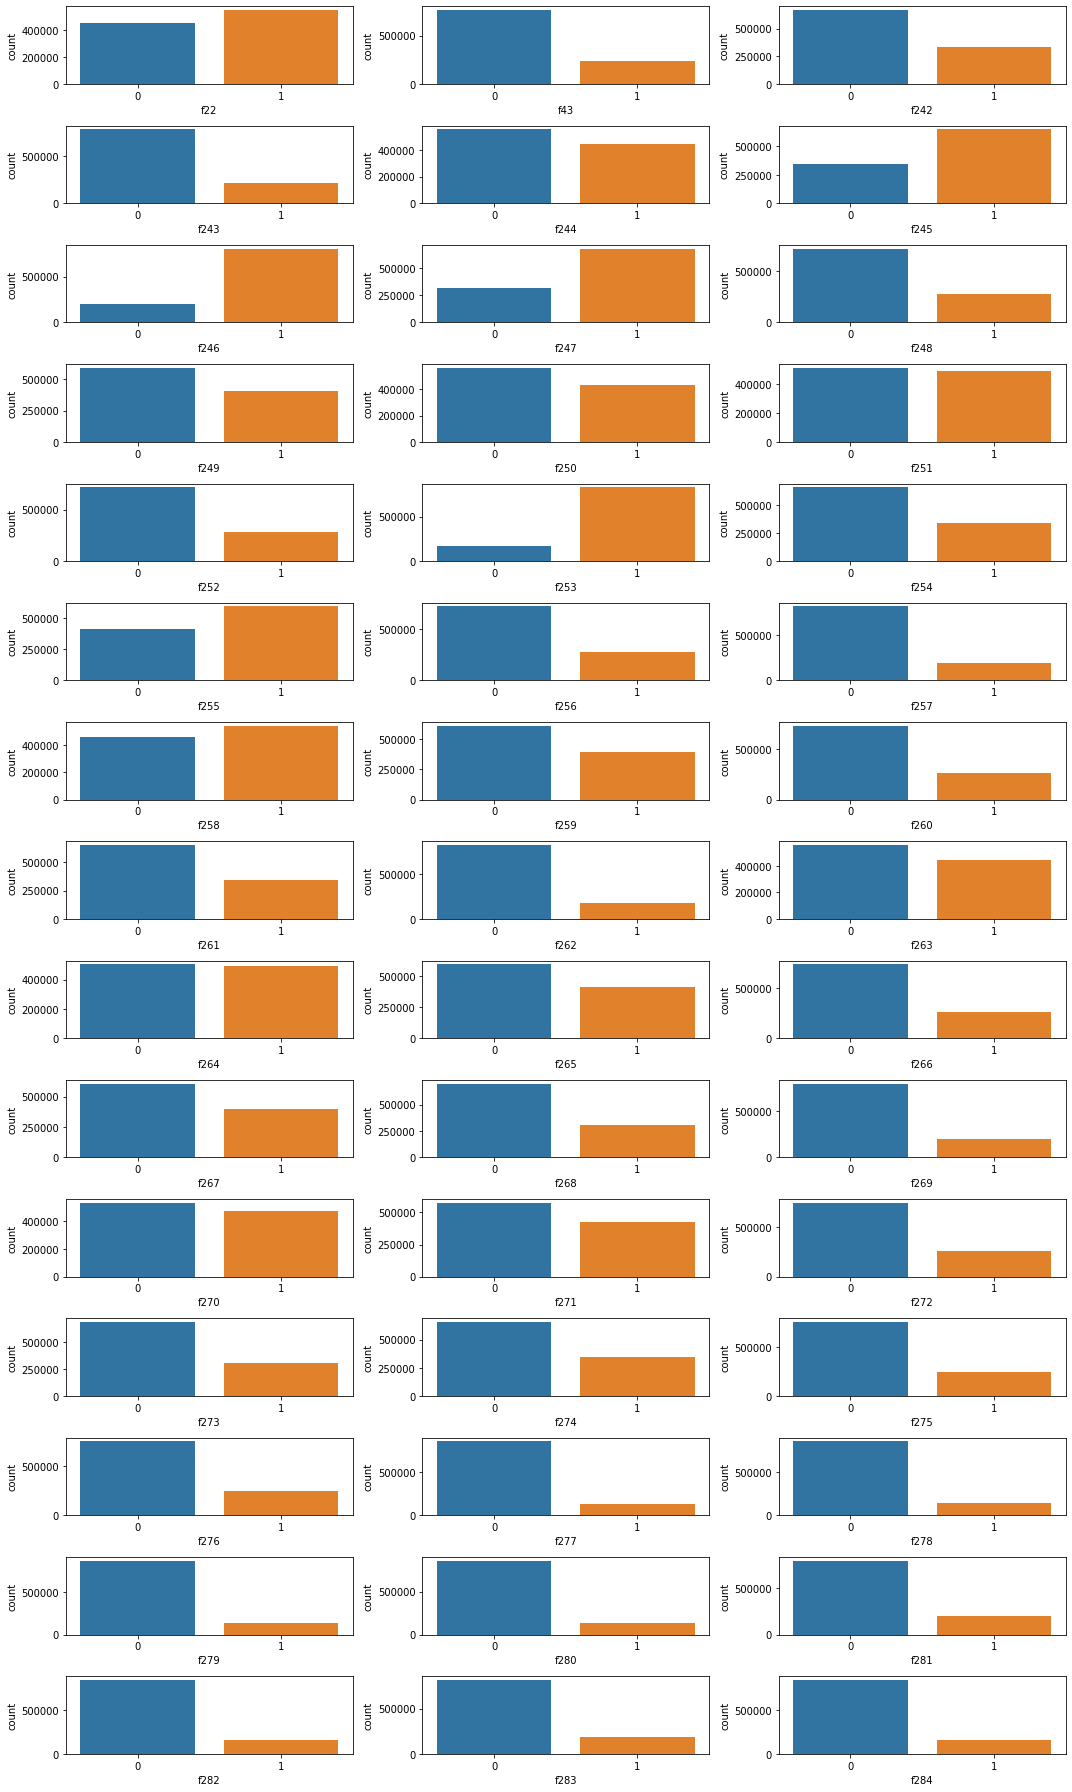

In [11]:
fig, ax = plt.subplots(15,3, figsize=(15,25))
ax = ax.flatten()
columns = train_df.select_dtypes(include='int64').drop(['id', 'target'], axis=1).columns

for i, column in enumerate(columns):
    sns.countplot(x=train_df[column], ax=ax[i])

plt.tight_layout()
fig.show()

Text(0, 0.5, 'Count')

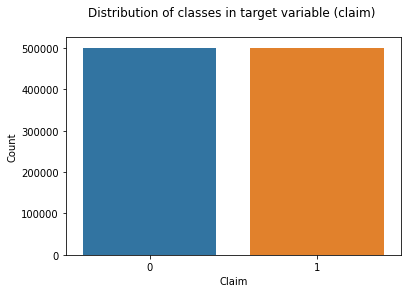

In [12]:
# Target Distribution
sns.countplot(train_df['target'])
plt.title('Distribution of classes in target variable (claim) \n')
plt.xlabel('Claim')
plt.ylabel('Count')

# Summary 2

As can be seen, the target variable isn't unbalanced, however there are many categorical variables that are unbalanced. When trainning a model we can test removing those to see how they affect the overall performance. 

Now lets check the non-categorical variables distribution.

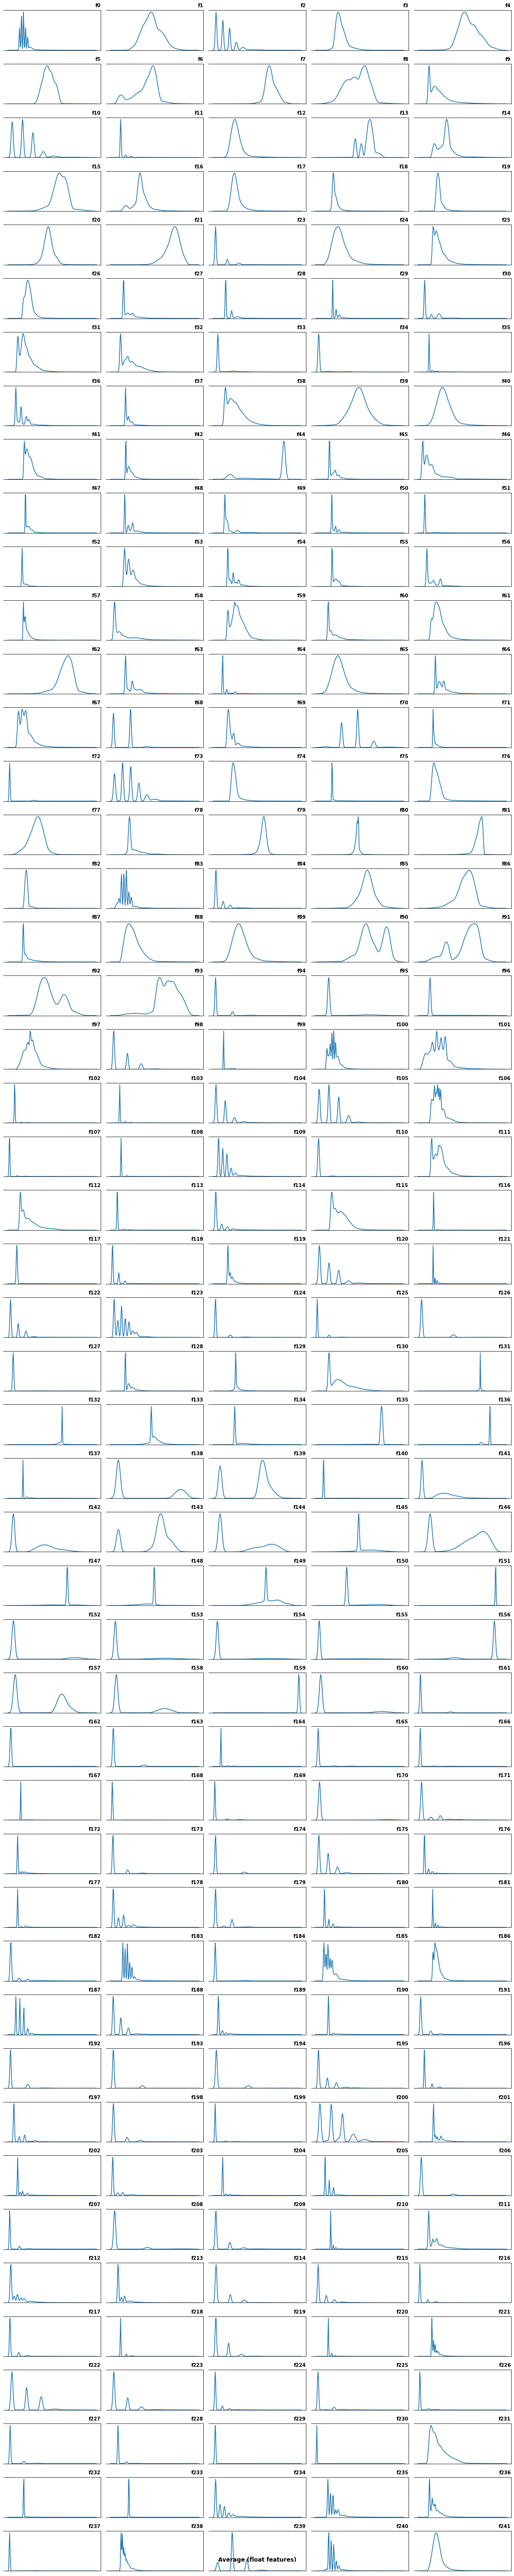

In [13]:
fig, axes = plt.subplots(48,5,figsize=(15, 75))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = train_df.select_dtypes(include='float64').columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=train_df[columns], x=columns[i],ax=ax,palette = ["#2a9d8f"])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(False)
    ax.set_title(columns[i], loc='right', weight='bold', fontsize=10)

fig.supxlabel('Average (float features)', ha='center', fontweight='bold')

fig.tight_layout()
plt.show()

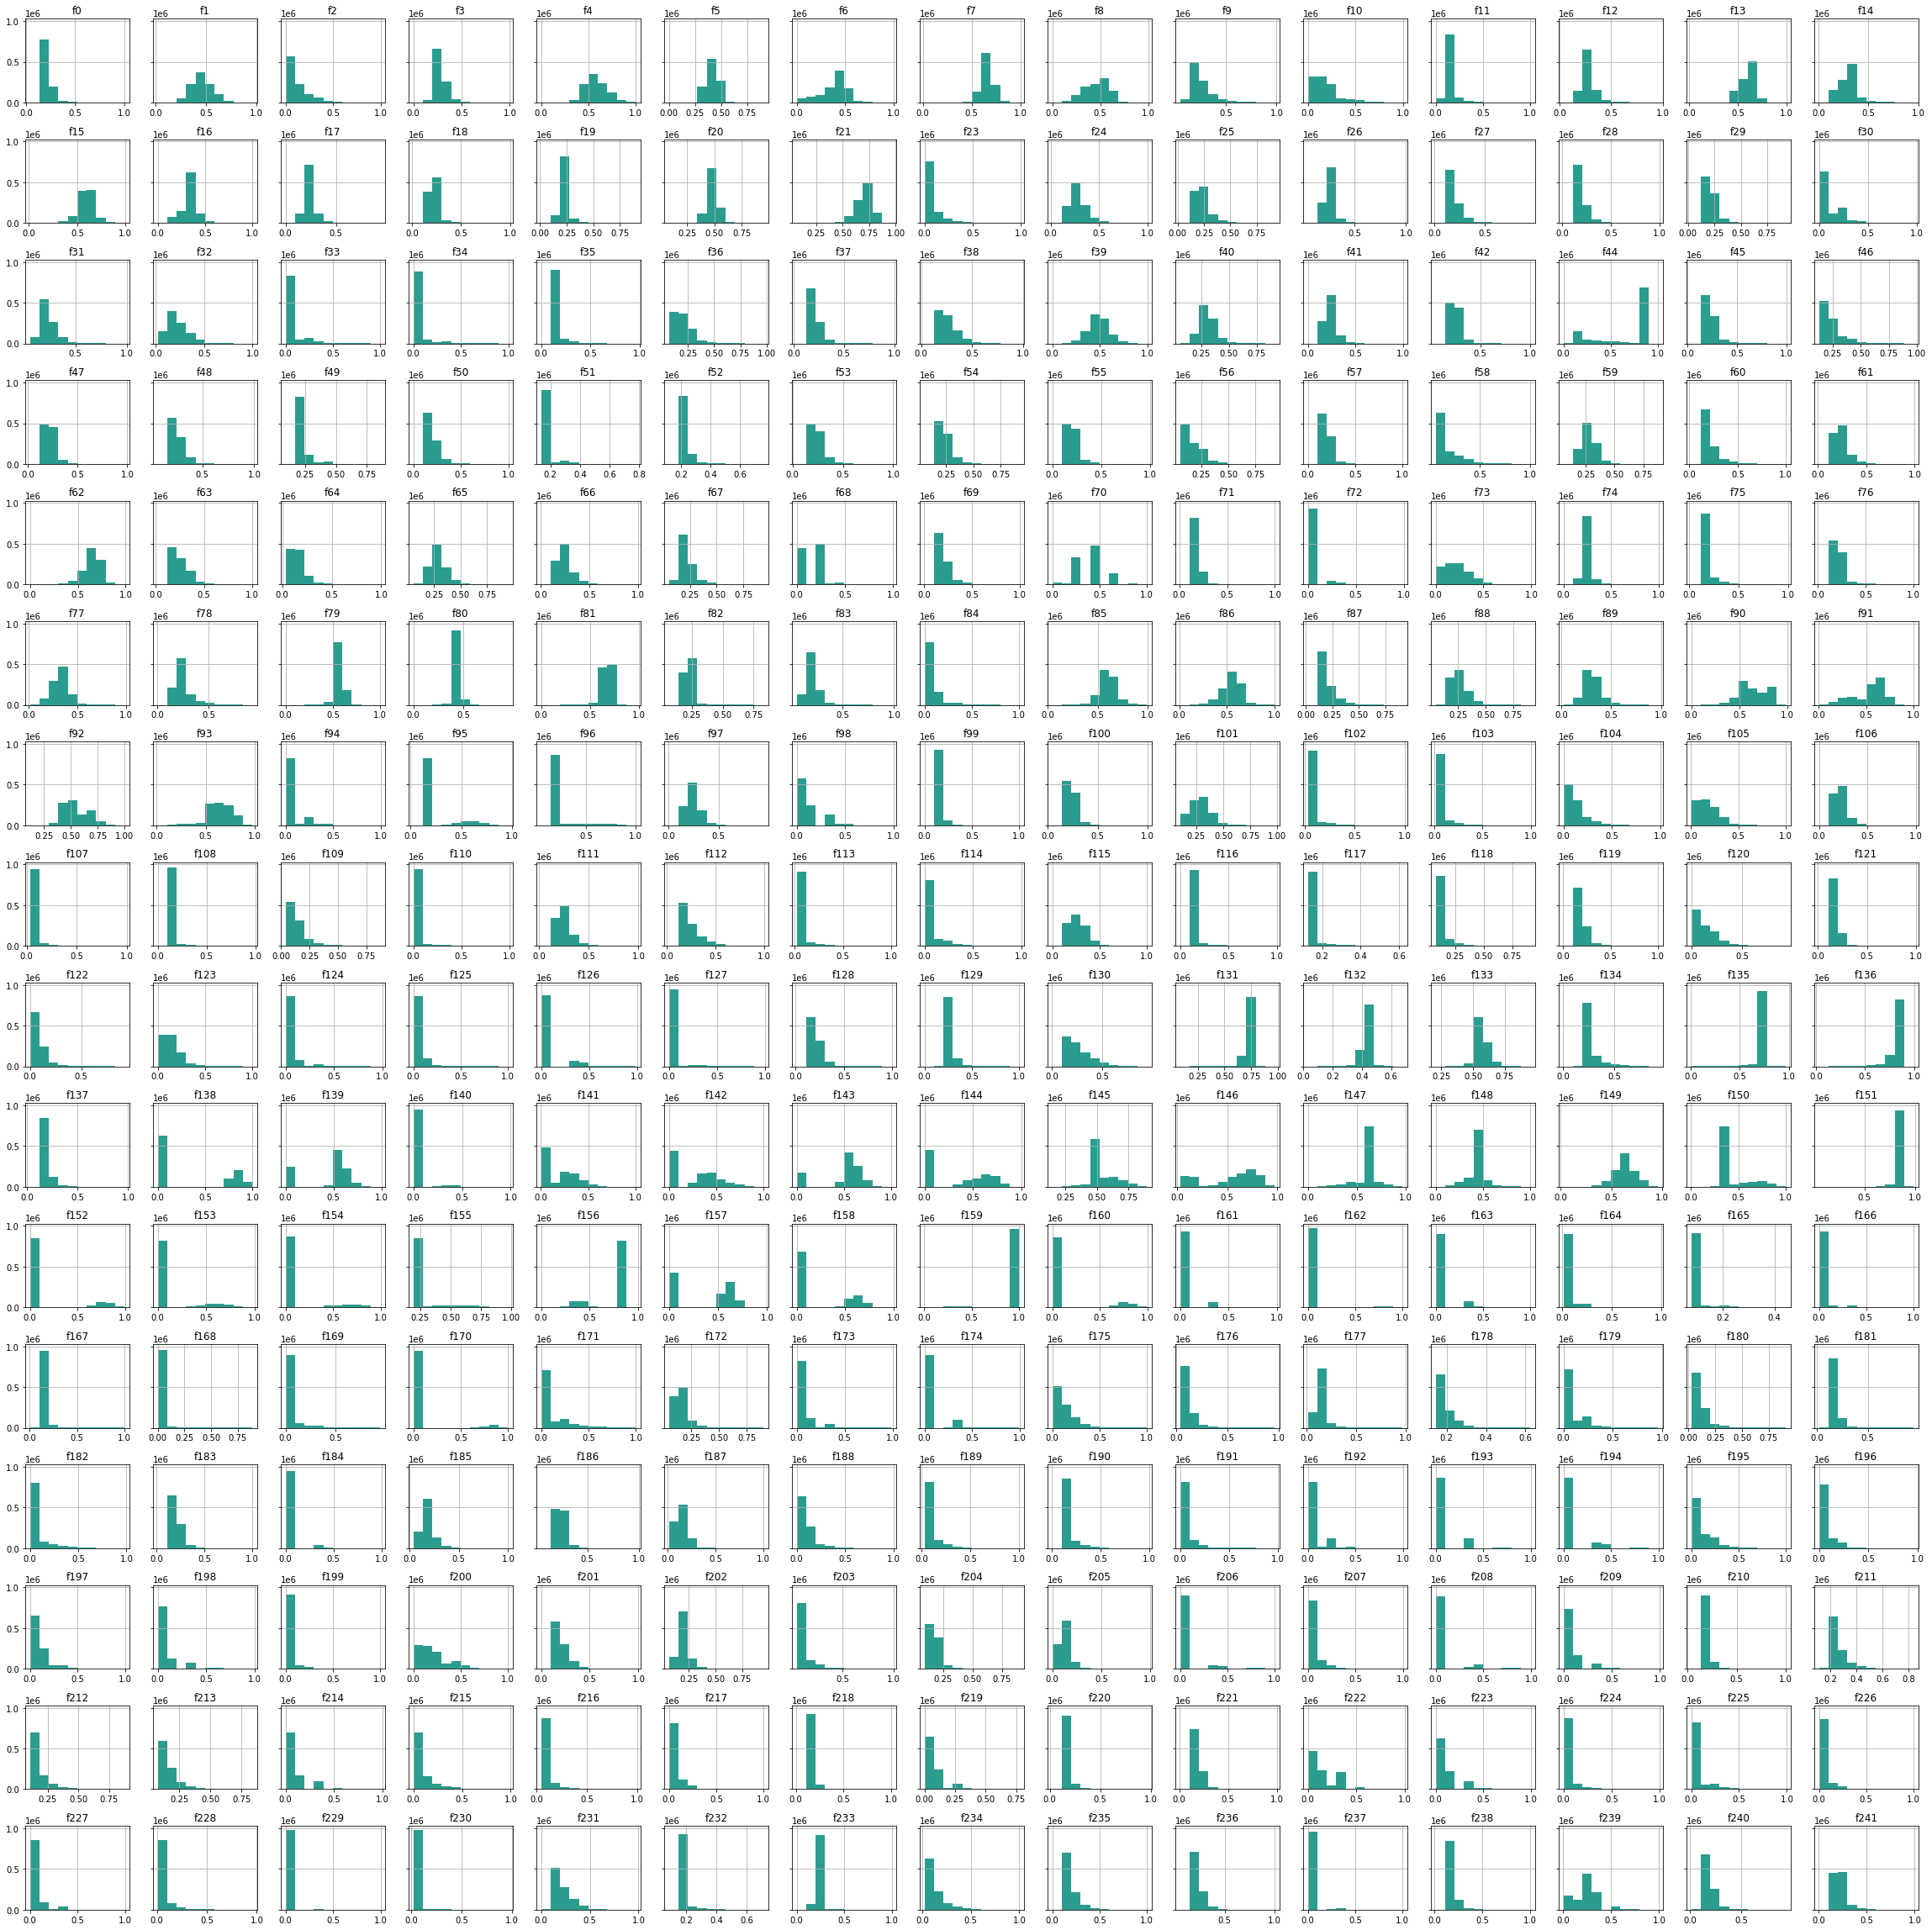

In [14]:
train_df.select_dtypes(include='float64').hist(figsize=(32, 32), sharey=True);
plt.tight_layout()

# Test dataset

Here we will do the same analysis to test datast 

In [15]:
del train_df

In [16]:
test_df = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2021/test.csv', sep=',')

In [17]:
test_df.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284
0,1000000,0.178216,0.435617,0.010230,0.202074,0.390170,0.324221,0.221722,0.738894,0.582588,...,1,0,0,0,0,0,1,1,1,0
1,1000001,0.181250,0.476455,0.022413,0.283146,0.598020,0.349508,0.283467,0.721575,0.268990,...,0,0,0,0,0,0,0,0,0,0
2,1000002,0.159721,0.451202,0.259649,0.365274,0.594634,0.413502,0.249318,0.642339,0.411104,...,0,0,0,0,0,0,1,0,0,0
3,1000003,0.182424,0.520976,0.095344,0.327742,0.741830,0.358711,0.270077,0.601662,0.297742,...,0,0,0,0,0,1,1,0,0,0
4,1000004,0.229329,0.336513,0.023511,0.300913,0.668738,0.481586,0.545660,0.667849,0.546045,...,0,0,0,0,1,0,0,1,0,0


In [18]:
print('Dataset shape: ', test_df.shape )

Dataset shape:  (500000, 286)


In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 286 entries, id to f284
dtypes: float64(240), int64(46)
memory usage: 1.1 GB


In [20]:
test_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,500000.0,1.250000e+06,144337.711634,1000000.000000,1.125000e+06,1.250000e+06,1.374999e+06,1.499999e+06
f0,500000.0,2.136951e-01,0.056670,0.000000,1.807110e-01,2.037990e-01,2.295450e-01,9.693840e-01
f1,500000.0,4.550073e-01,0.102219,0.019280,3.838607e-01,4.481490e-01,5.182550e-01,9.562660e-01
f2,500000.0,1.250876e-01,0.123786,0.000315,1.753550e-02,9.445710e-02,1.766100e-01,9.710670e-01
f3,500000.0,2.774628e-01,0.064343,0.045517,2.339050e-01,2.642560e-01,3.068022e-01,9.988440e-01
...,...,...,...,...,...,...,...,...
f280,500000.0,1.439740e-01,0.351064,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
f281,500000.0,1.962260e-01,0.397142,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
f282,500000.0,1.572280e-01,0.364016,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
f283,500000.0,1.725560e-01,0.377863,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [21]:
print("There are", test_df.isna().any().sum(), "missing values")
print()
print(test_df.isna().sum())
print()
print(test_df.isnull().sum())

There are 0 missing values

id      0
f0      0
f1      0
f2      0
f3      0
       ..
f280    0
f281    0
f282    0
f283    0
f284    0
Length: 286, dtype: int64

id      0
f0      0
f1      0
f2      0
f3      0
       ..
f280    0
f281    0
f282    0
f283    0
f284    0
Length: 286, dtype: int64


In [22]:
min_cat_n = test_df.select_dtypes(include='int64').drop(['id'], axis=1).nunique().min()
max_cat_n = test_df.select_dtypes(include='int64').drop(['id'], axis=1).nunique().max()

print('The minimum number of classes in the categorical variables is', min_cat_n)
print('The maximum number of classes in the categorical variables is', max_cat_n)

The minimum number of classes in the categorical variables is 2
The maximum number of classes in the categorical variables is 2


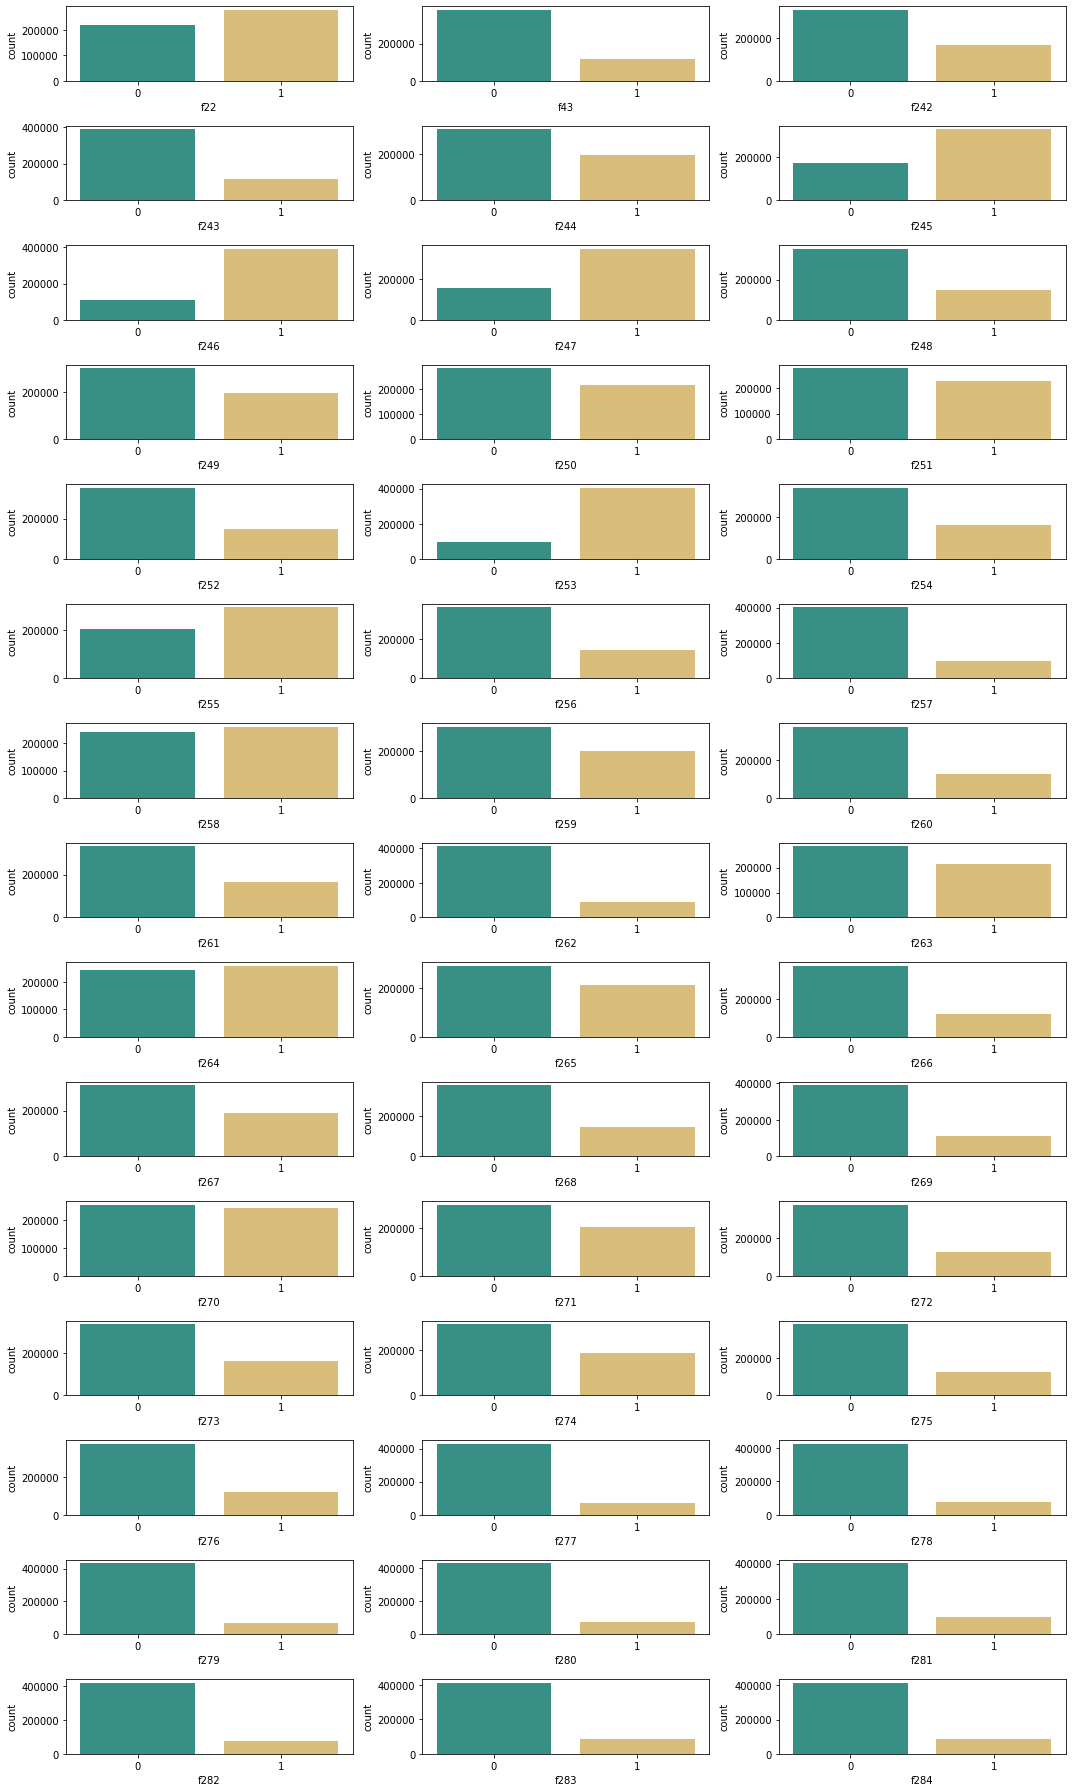

In [23]:
fig, ax = plt.subplots(15,3, figsize=(15,25))
ax = ax.flatten()
columns = test_df.select_dtypes(include='int64').drop(['id'], axis=1).columns

for i, column in enumerate(columns):
    sns.countplot(x=test_df[column], ax=ax[i])

plt.tight_layout()
fig.show()

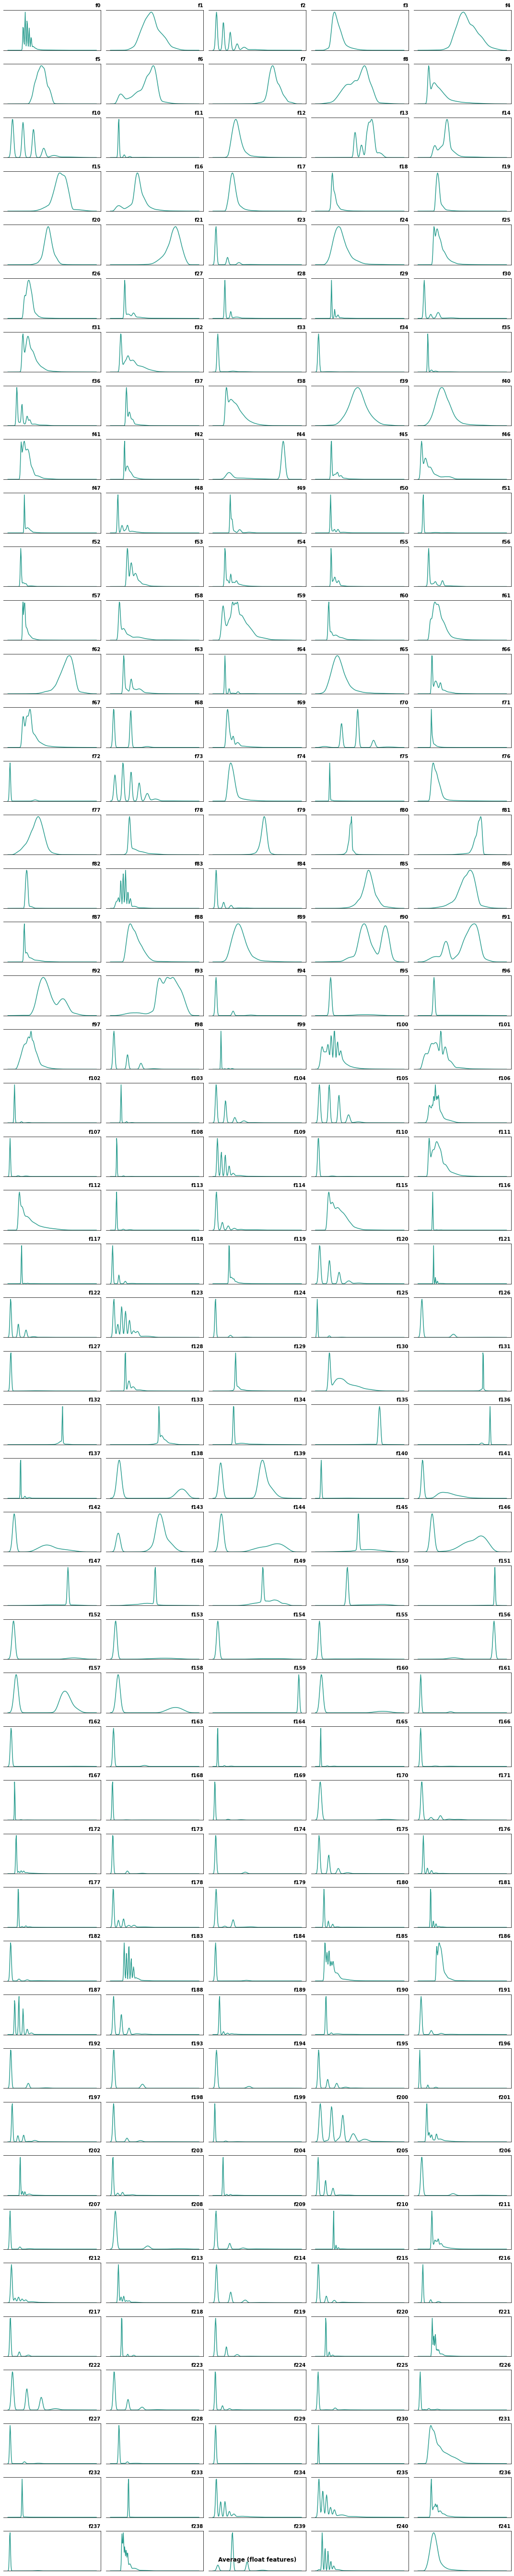

In [24]:
fig, axes = plt.subplots(48,5,figsize=(15, 75))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = test_df.select_dtypes(include='float64').columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=test_df[columns], x=columns[i],ax=ax,palette = ["#2a9d8f"])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(False)
    ax.set_title(columns[i], loc='right', weight='bold', fontsize=10)

fig.supxlabel('Average (float features)', ha='center', fontweight='bold')

fig.tight_layout()
plt.show()

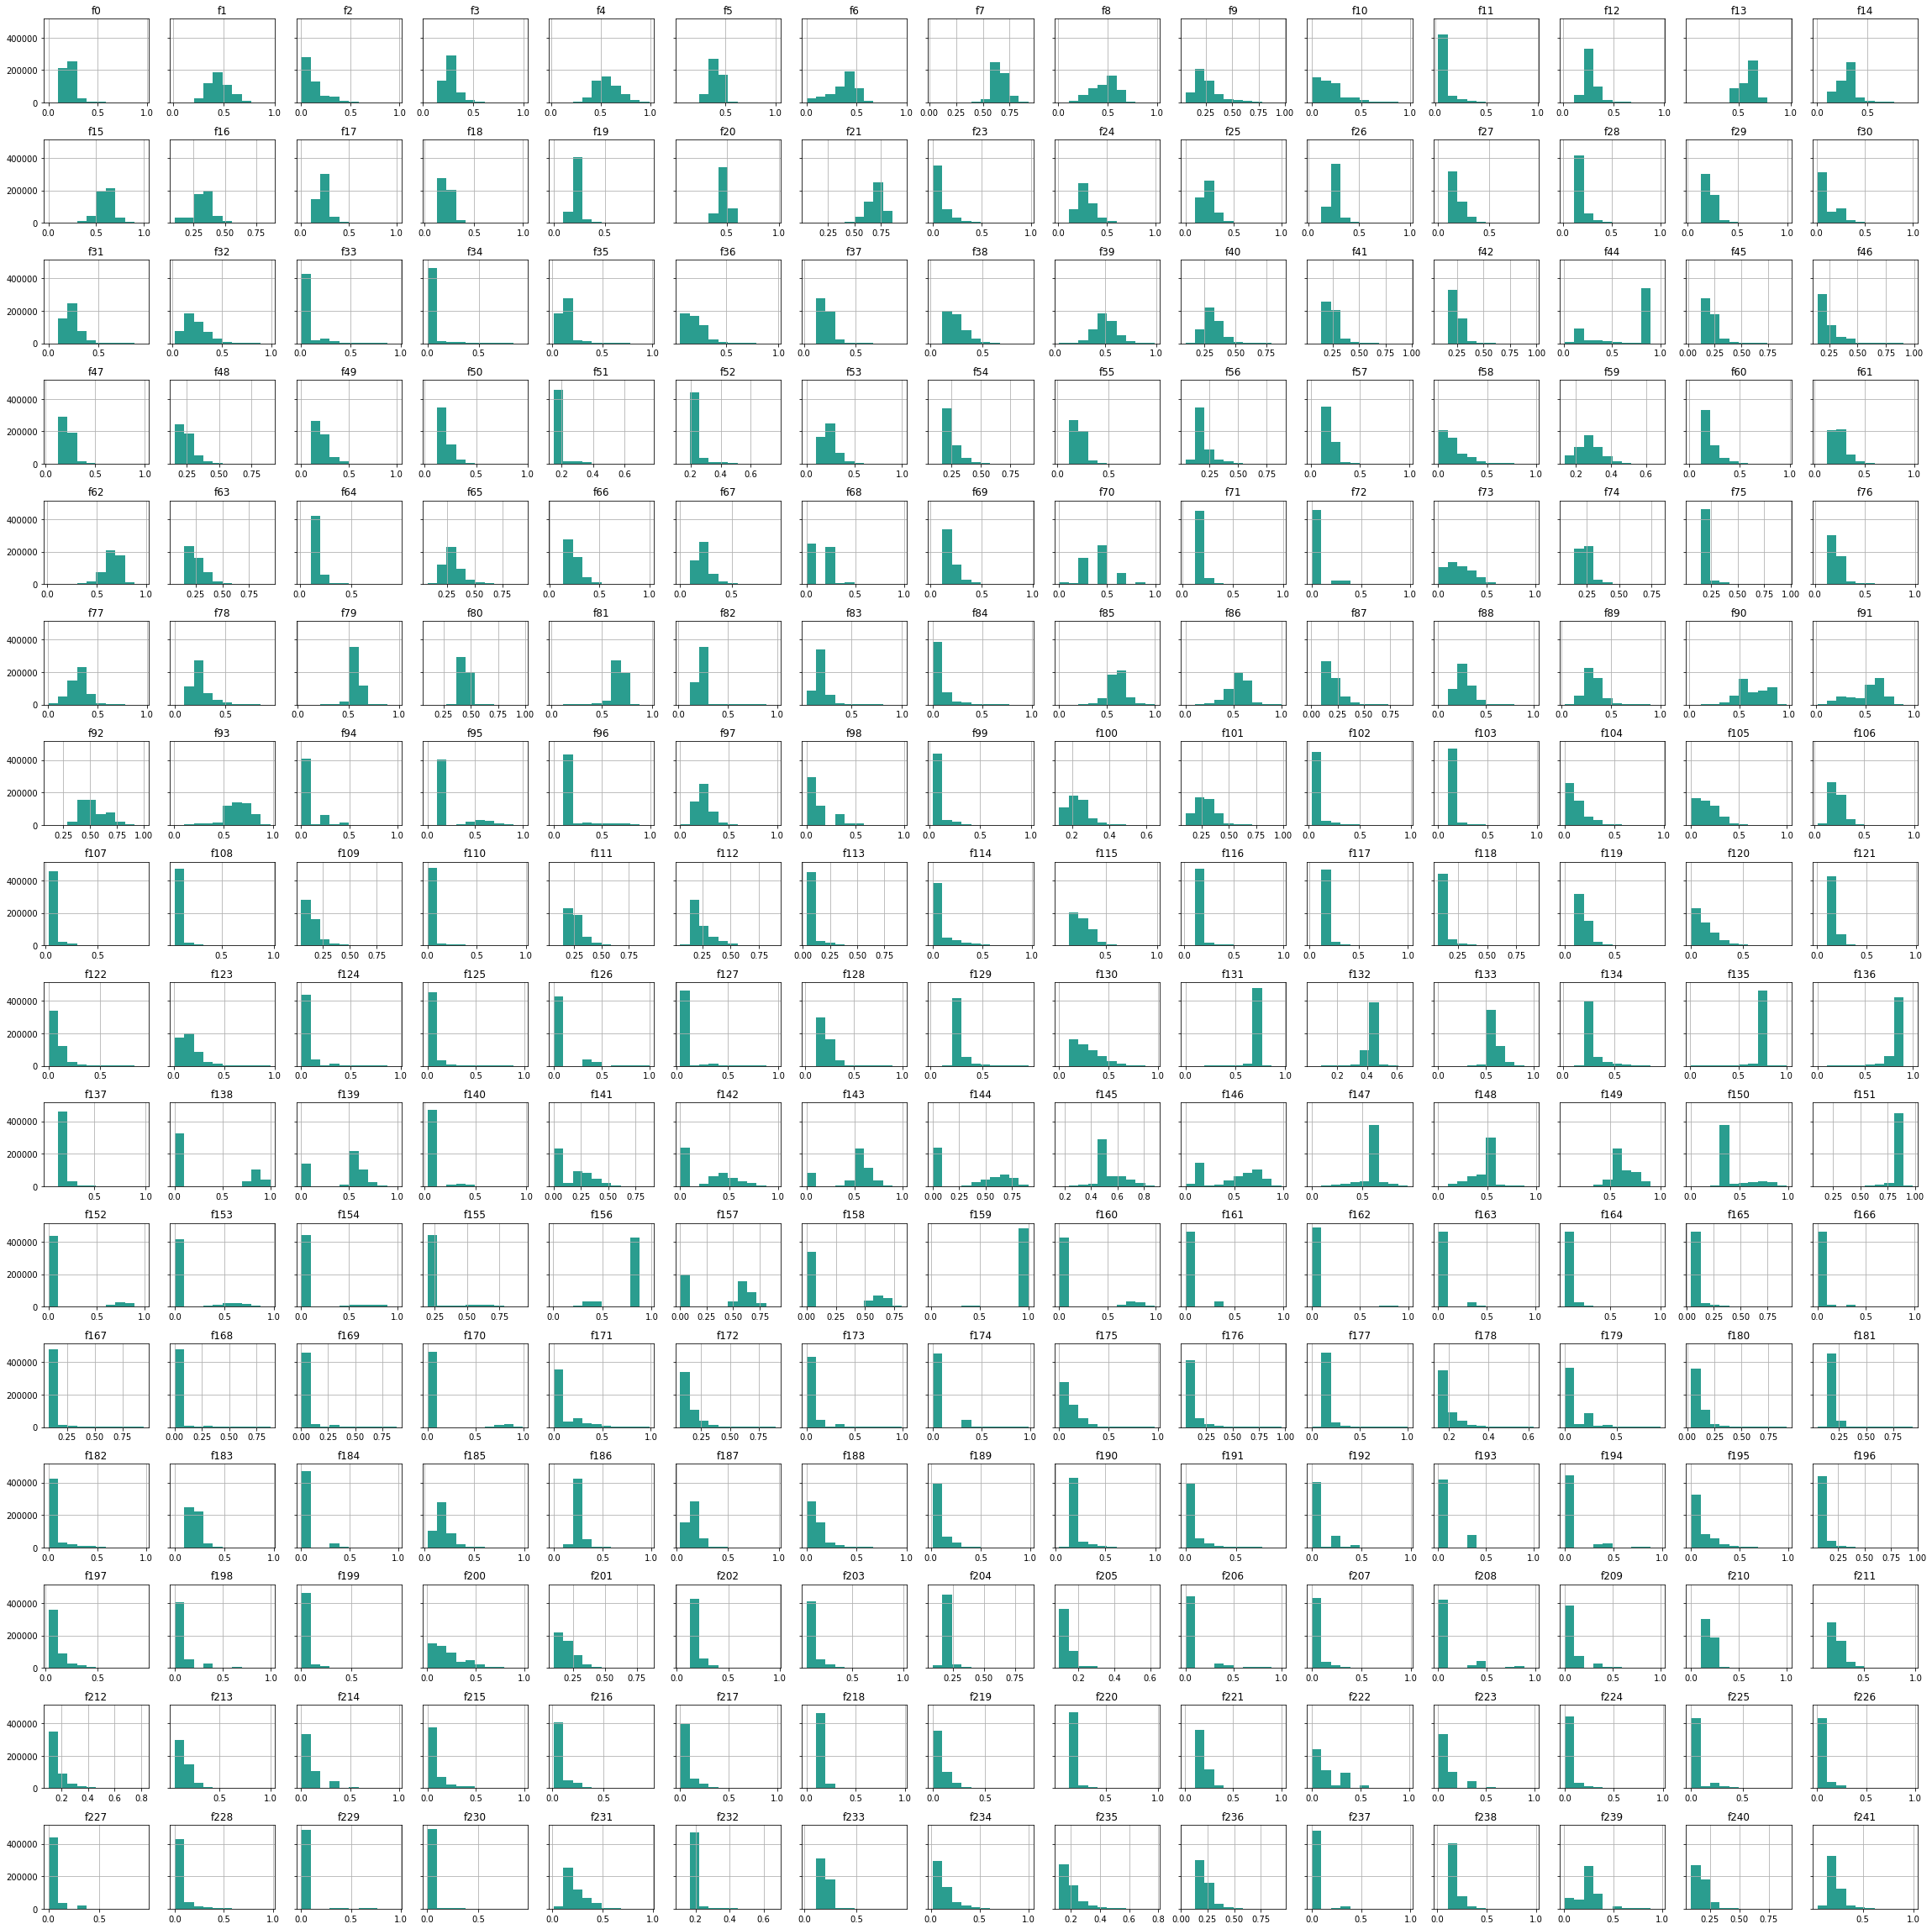

In [25]:
test_df.select_dtypes(include='float64').hist(figsize=(32, 32), sharey=True);
plt.tight_layout()